In [1]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [2]:
f = open("train.txt",'r')

In [3]:
label=[]
phrase=[]
lines = f.readlines()
for l in lines:
    label.append(l[:5])
    phrase.append(l[5:])

In [4]:
labelSet=set(label)
print(labelSet)

{'(GER)', '(ITA)', '(ARA)', '(KOR)', '(SPA)', '(TEL)', '(FRE)', '(TUR)', '(HIN)', '(CHI)', '(JPN)'}


In [5]:
df = pd.DataFrame(list(zip(label, phrase)), columns =['label', 'doc']) 
print(df) 

      label                                                doc
0     (GER)   IThe importance and popularity of travelling ...
1     (TUR)   It is an important decision , how to plan you...
2     (CHI)   Some people believe that young people can enj...
3     (TEL)   Travelling is usually considered as good recr...
4     (ARA)   i agree that . Life is a person live period o...
...     ...                                                ...
9895  (CHI)   Nowadays , more and more people go abroad , n...
9896  (KOR)   In accomplishing something that is risky come...
9897  (SPA)   At the beginning of the 21st century , the in...
9898  (HIN)   The number of cars in use across the world ha...
9899  (CHI)   Many people think it is betters to have borad...

[9900 rows x 2 columns]


In [6]:
from sklearn.preprocessing import LabelEncoder
X=df["doc"]
y=df["label"]
lf = LabelEncoder().fit(y)
new_y = lf.transform(y)

In [7]:
y=df["label"].tolist()
le = LabelEncoder()
le.fit(df.label.unique())
new_y=le.fit_transform(y)

# TF-IDF avec logistic regression

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

cv = CountVectorizer(stop_words='english')
cv_X = cv.fit_transform(X)

tf = TfidfVectorizer(stop_words='english')
tf_X = tf.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, new_y, random_state=4)

In [10]:
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_X = cv.transform(X)


In [11]:
df.doc

0        IThe importance and popularity of travelling ...
1        It is an important decision , how to plan you...
2        Some people believe that young people can enj...
3        Travelling is usually considered as good recr...
4        i agree that . Life is a person live period o...
                              ...                        
9895     Nowadays , more and more people go abroad , n...
9896     In accomplishing something that is risky come...
9897     At the beginning of the 21st century , the in...
9898     The number of cars in use across the world ha...
9899     Many people think it is betters to have borad...
Name: doc, Length: 9900, dtype: object

In [12]:
# tf -idf with lr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
vectorizer = TfidfVectorizer()
X_counts = vectorizer.fit_transform(df.doc)
X_train, X_test, y_train, y_test = train_test_split(X_counts, new_y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6787878787878788


c:\Users\guoxu\Desktop\myenvs\mlstat\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
vectorizer = TfidfVectorizer()
X_counts = vectorizer.fit_transform(df.doc)
X_train, X_test, y_train, y_test = train_test_split(X_counts, new_y, test_size=0.2, random_state=42)
lr = LogisticRegression()
bow_lr = lr.fit(X_train, y_train)
y_pred = bow_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6787878787878788


c:\Users\guoxu\Desktop\myenvs\mlstat\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# cv with lr 
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df.doc)
X_train, X_test, y_train, y_test = train_test_split(X_counts, new_y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', random_state = 29)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6116161616161616


<AxesSubplot: >

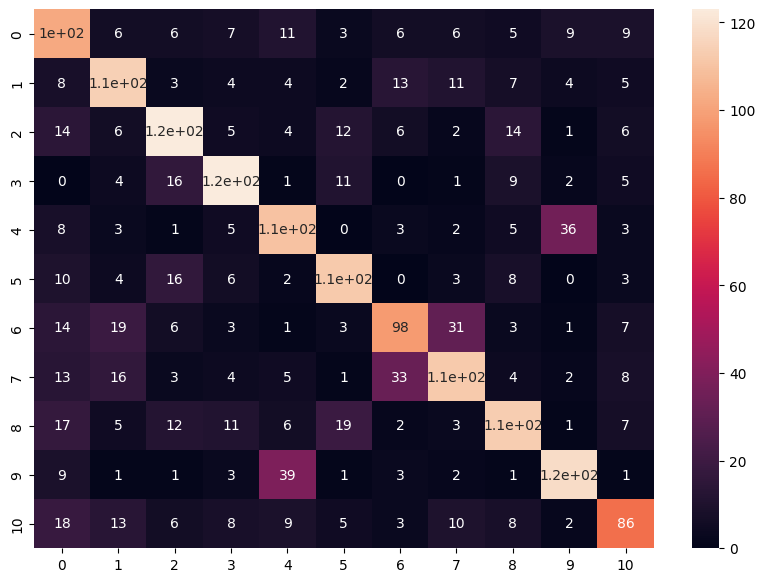

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
C2 = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(C2)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)